In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [2]:
dataframe = pd.read_csv('AmesHousing.csv', usecols=['Overall Qual','Garage Area','Garage Cars','Garage Cars',
                                                    'Year Built','Year Remod/Add','Garage Cars','1st Flr SF',
                                                   'SalePrice'])

In [3]:
dataframe.head()

,Overall Qual,Year Built,Year Remod/Add,1st Flr SF,Garage Cars,Garage Area,SalePrice
0,6,1960,1960,1656,2.0,528.0,215000
1,5,1961,1961,896,1.0,730.0,105000
2,6,1958,1958,1329,1.0,312.0,172000
3,7,1968,1968,2110,2.0,522.0,244000
4,5,1997,1998,928,2.0,482.0,189900


In [4]:
dataframe.corr()

,Overall Qual,Year Built,Year Remod/Add,1st Flr SF,Garage Cars,Garage Area,SalePrice
Overall Qual,1.000000,0.597027,0.569609,0.477837,0.599545,0.563503,0.799262
Year Built,0.597027,1.000000,0.612095,0.310463,0.537443,0.480131,0.558426
Year Remod/Add,0.569609,0.612095,1.000000,0.242108,0.425403,0.376438,0.532974
1st Flr SF,0.477837,0.310463,0.242108,1.000000,0.439458,0.491223,0.621676
Garage Cars,0.599545,0.537443,0.425403,0.439458,1.000000,0.889676,0.647877
Garage Area,0.563503,0.480131,0.376438,0.491223,0.889676,1.000000,0.640401
SalePrice,0.799262,0.558426,0.532974,0.621676,0.647877,0.640401,1.000000


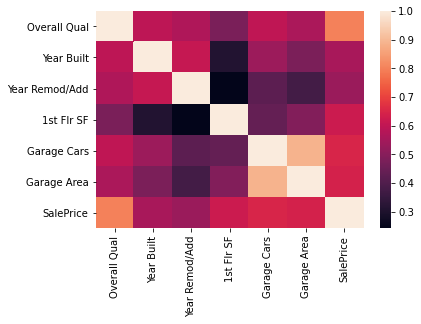

In [5]:
sns.heatmap(dataframe.corr());

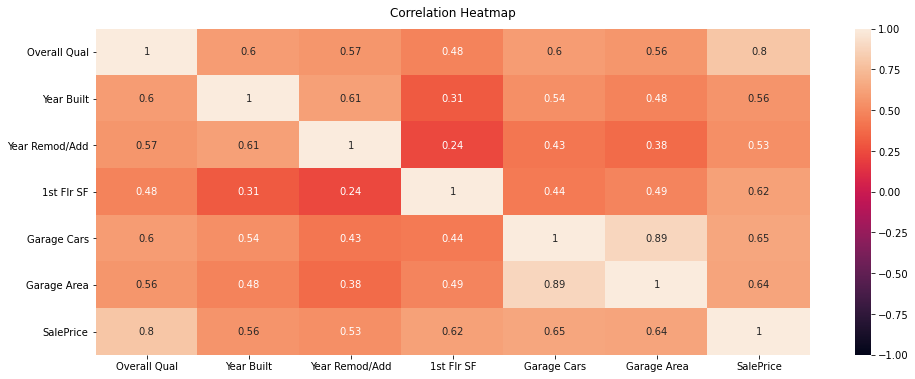

In [6]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

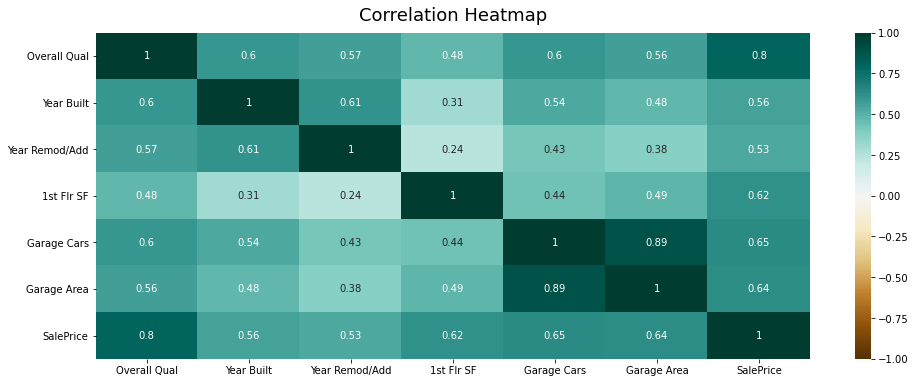

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [8]:
np.triu(np.ones_like(dataframe.corr()))

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

<ipython-input-9-cca60b02f36d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))


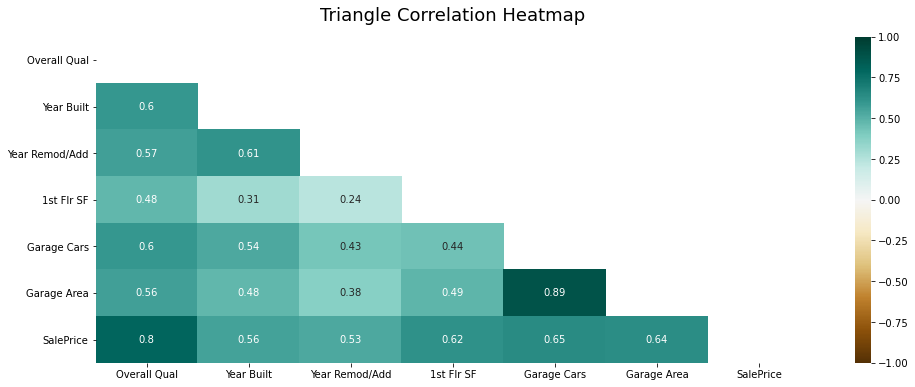

In [9]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [10]:
dataframe.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Garage Cars,0.647877
Garage Area,0.640401
1st Flr SF,0.621676
Year Built,0.558426
Year Remod/Add,0.532974


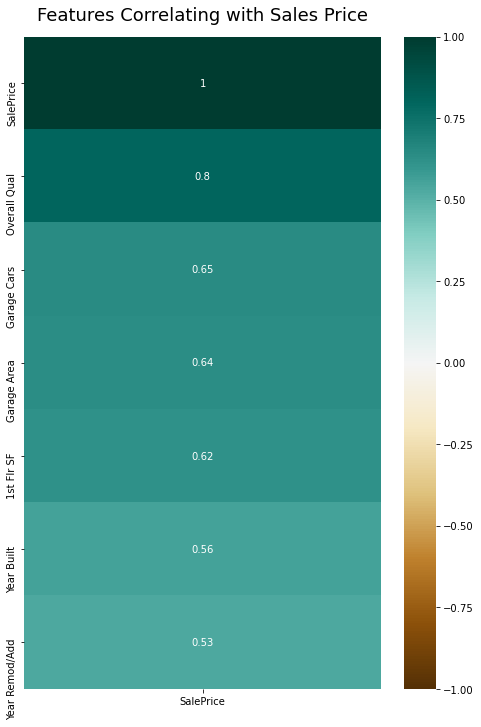

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataframe.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);